# Hypothesis  testing: overview of conceptual process

1. Null and Alternative Hypotheses

Hypothesis tests start with a null and alternative hypothesis; the null hypothesis describes no difference from the expected population value; the alternative describes a particular kind of difference from an expected population value (less than, greater than, or different from). For example if we wanted to perform a hypothesis test examining if there is a significant difference between the temperature on earth in 1990 as compared to the temperature in 2020, we could define the following null and alternative hypotheses:

Null: The average temperature on earth in 1990 was the same as the average temperature in 2020
Alternative: The average temperature on earth in 1990 was less than the average temperature in 2020

# Hypothesis: Testing TESTING A SAMPLE STATISTIC against an assumed Population Statistic
The core idea, can be summed up in the folowing steps:

    1. Draw a sample from a population.
    2. Measure desctiptive statistics from this population.
    3. Evaluate the sample statistics realtive to ***
    4. Apply CLT to sample attributes (sample size, chosen statistic mean/proportion),
        to infere confidence interval of population statistic, the sample statistic is  in
    5. Invert the conclusion to infer confidence intervall of sample statistic the population statistic (See Nouma's Visualization).

Conceptually we go through the following steps

1. Assume a population statistic
2. Calculate sample statistic
3. Draw Sampling distribution using assumed population statistic as a basis.
4. Place sample statistic within the sampling distribution
5. Draw the confidence intervalls of sampling distribution the sample statistic falls within.

We have a NUll hypothesis

ssimulations run a null distribution:
the distribution given that the statistic of the null hypothesis is true

##### results of tests

given, that the null hypothesis is true,

 we have P-value % of chance, to get the observed data

## Communicating and talking about hypothesis tests:  expressions and understanding:

"Binomial tests are similar to one-sample t-tests in that they test a sample statistic against some population-level expectation."

#### When to do a Hypothesis Test:
    1. The sample is randomly drawn
    2. Each observations within the sample are independent
#### When not to do it? When the constraints above are not met

## A one Sample T-TEST

Explanation trials:

When to do a t-test:

    1. compare a sample mean to an expected population mean.
    
----------------
Testing the association of a categorical variable and a quantitative variable within the population using the summary statistics from a sample

----------------
Important. If the sample has a specific category.
We assume the sample to be representative of  a population with this specific sample

----------------
The reason it’s not satisfying is this: if we randomly choose ANY ohter sample of the same size from the population and calculate the summary statistic for that sample, there’s a 50% chance it will be higher than the population average. Observing a higher average for a single sample is not surprising.

----------------
The reason it’s not satisfying is this: if we randomly choose ANY ohter sample of the same size from the population and calculate the summary statistic for that sample, there’s a 50% chance it will be higher than the population average. Observing a higher average for a single sample is not surprising.

### Coding one sample ttest

In [1]:
from scipy.stats import ttest_1samp

#### When to choose  t_test
    1. When the sample data is normally distributed
    OR the sample size is large enough

### Simuating a one_sample ttest

    1) Given: given_sample and (assumed) population mean
    2) Intention:
        2.1) get sample size and sample mean
        2.2) calculate pop_std
        2.3) calculate std_error
        2.4) calculate z-statistic (optional)
    3) apply cumulative distribution function using (sample_mean, pop_mean, std_error) to get

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, norm

# np.random.seed(1)
# sample = np.random.normal(30, 10, size = 100)

def simulation_one_samp_ttest(observed_data, pop_mean):
    
    # applying clt for one_sample_ttest
    
    # sample attributes: mean and samp size
    samp_mean = round(np.mean(observed_data))
    samp_size = len(observed_data)
    
    # estimate the population standard deviation:
    pop_std_est = (np.var(observed_data, ddof = 1))**0.5
    std_error = pop_std_est /(samp_size**0.5)
    
    p_value = norm.cdf(samp_mean, pop_mean, std_error) 

    return p_value


def simulation_one_samp_ttest_2(observed_data, pop_mean):
    
    # applying clt for one_sample_ttest
    
    # sample attributes: mean and samp size
    samp_mean = round(np.mean(observed_data))
    samp_size = len(observed_data)
    
    # estimate the population standard deviation:
    pop_std_est = (np.var(observed_data, ddof = 1))**0.5
    std_error = pop_std_est /(samp_size**0.5)
    
    z_statistic = (samp_mean - pop_mean)/std_error
        
    p_value = norm.cdf(z_statistic, 0, 1) 
    return p_value


#Test your function below by uncommenting the code below. You should see that your simulation function gives you a very similar answer to the binom_test function from scipy:

sample = [1,1,1,1,1,1,1,1,1,1,123,234,5,2,32,5,53,234,54,23,532,54,23,54,4,23,234,5,42,325,43,23,234,324,432,432,23,54,8,67,29,38,38]

In [3]:
for i in range(10):
    random_pop_mean = np.random.choice(range(0,120), 1)
    print("\nRandom selected mean:  ", random_pop_mean)
    p_value3 = simulation_one_samp_ttest_2(sample, random_pop_mean)
    p_value1 = simulation_one_samp_ttest(sample, random_pop_mean)
    t_stat, p_value2 = ttest_1samp(sample, random_pop_mean, alternative = 'less')

    print("\nttest_1_samp p-value: ", p_value2,"\nsimulation_1 p-value: ", p_value1,"\nsimulation_2 p-value: ", p_value3)


Random selected mean:   [105]

ttest_1_samp p-value:  [0.22104814] 
simulation_1 p-value:  [0.22249634] 
simulation_2 p-value:  [0.22249634]

Random selected mean:   [42]

ttest_1_samp p-value:  [0.98447646] 
simulation_1 p-value:  [0.98757195] 
simulation_2 p-value:  [0.98757195]

Random selected mean:   [18]

ttest_1_samp p-value:  [0.99920562] 
simulation_1 p-value:  [0.99964966] 
simulation_2 p-value:  [0.99964966]

Random selected mean:   [47]

ttest_1_samp p-value:  [0.97359254] 
simulation_1 p-value:  [0.97751567] 
simulation_2 p-value:  [0.97751567]

Random selected mean:   [45]

ttest_1_samp p-value:  [0.97855972] 
simulation_1 p-value:  [0.9821541] 
simulation_2 p-value:  [0.9821541]

Random selected mean:   [31]

ttest_1_samp p-value:  [0.99569664] 
simulation_1 p-value:  [0.9971863] 
simulation_2 p-value:  [0.9971863]

Random selected mean:   [13]

ttest_1_samp p-value:  [0.99960203] 
simulation_1 p-value:  [0.99985719] 
simulation_2 p-value:  [0.99985719]

Random selected

### Simulation of one sample ttest USING SAMPLING DISTRIBUTION

1) Given: given_sample + Population
2) --> draw random samples
3) --> calculate sample proportions
4) --> draw sampling distribution of proportions
5) --> define: number of samples with proportions lesser than given_sample =: p
6) --> calculate p-value by dividing p by the total number of samples drawn*
*caveat: of course we only get an approximation, as the SDSP is theoretically drawing infinite samples

In [25]:
def simulation_one_samp_ttest_PVAL(observed_data, pop_mean):
    
    # applying clt for one_sample_ttest
    
    # sample attributes: mean and samp size
    samp_mean = round(np.mean(observed_data))
    samp_size = len(observed_data)
    
    # estimate the population standard deviation:
    pop_std_est = (np.var(observed_data, ddof = 1))**0.5
    std_error = pop_std_est /(samp_size**0.5)
    
    # Simulate the samples and calculates their means
    sample_means_distr = []
    for i in range(100000):
        # sample a single mean from the sampling distribution of sample means
        samp = np.random.normal(pop_mean, std_error, 1)
        
        # save result to list of means of sdsm
        sample_means_distr.append(round(np.mean(samp[0])))
        
    # 
    #calculate a 1-sided p-value (probability) for getting observations equal or lesser than sample
    sample_means_distr = np.array(sample_means_distr)
    p_value = np.sum(sample_means_distr <= samp_mean)/len(sample_means_distr) 

    return p_value

In [26]:
##  testing the simulation:

for i in range(10):
    random_pop_mean = np.random.choice(range(80,96), 1)
    print("Random selected mean:  ", random_pop_mean)
    p_value1 = simulation_one_samp_ttest_PVAL(sample, random_pop_mean)
    t_stat, p_value2 = ttest_1samp(sample, random_pop_mean, alternative = 'less')
    print("SImulation PVAL: ", p_value1, "\nttest_1samp p-value: ", p_value2)
    print("The p_value difference is: ", p_value2 - p_value1)

Random selected mean:   [83]
SImulation PVAL:  0.61927 
ttest_1samp p-value:  [0.60736601]
The p_value difference is:  [-0.01190399]
Random selected mean:   [82]
SImulation PVAL:  0.64031 
ttest_1samp p-value:  [0.62545477]
The p_value difference is:  [-0.01485523]
Random selected mean:   [89]
SImulation PVAL:  0.50437 
ttest_1samp p-value:  [0.49515725]
The p_value difference is:  [-0.00921275]
Random selected mean:   [93]
SImulation PVAL:  0.43281 
ttest_1samp p-value:  [0.41999586]
The p_value difference is:  [-0.01281414]
Random selected mean:   [95]
SImulation PVAL:  0.39591 
ttest_1samp p-value:  [0.3833464]
The p_value difference is:  [-0.0125636]
Random selected mean:   [90]
SImulation PVAL:  0.49064 
ttest_1samp p-value:  [0.47624046]
The p_value difference is:  [-0.01439954]
Random selected mean:   [91]
SImulation PVAL:  0.47176 
ttest_1samp p-value:  [0.457379]
The p_value difference is:  [-0.014381]
Random selected mean:   [95]
SImulation PVAL:  0.39553 
ttest_1samp p-value

--->  work in progress
#### Simulation creating a population and ???

In [14]:
def simulation_one_samp_ttest_3(observed_data, pop_mean):
    
    # applying clt for one_sample_ttest
    
    # sample attributes: mean and samp size
    samp_mean = round(np.mean(observed_data))
    samp_size = len(observed_data)
    
    # estimate the population standard deviation:
    pop_std_est = (np.var(observed_data, ddof = 1))**0.5
    # std_error = pop_std_est /(samp_size**0.5)
    
    # Create the null-hypothesis_population with std based on sample_estimated 
    population = np.random.normal(pop_mean, pop_std_est, size = 100000)

    # Simulate the samples and calculates their means
    sample_means_distr = []
    for i in range(10000):
        samp = np.random.choice(population, samp_size, replace = False)
        # create sampling distribution of the mean _ saving means of samples
        sample_means_distr.append(round(np.mean(samp)))

    sample_means_distr.sort()
    # print(sample_means_distr)
    idx = None
    if samp_mean in sample_means_distr:
        idx = sample_means_distr.index(samp_mean)
    else:
        val = max([x for x in sample_means_distr if x <= samp_mean])
        # print("This is val", val)
        idx = sample_means_distr.index(val)
        
    return idx/len(sample_means_distr)

'''
When simulating the sampling distribution for proportions to emulate the binomial test,
I could construcct samples without requiring a population. Just  with the populations proportion, and the sample size
'''
    
print(simulation_one_samp_ttest_4(sample, 100))

None


In [5]:
print(np.mean(sample))

88.74418604651163


In [28]:
for i in range(10):
    random_pop_mean = np.random.choice(range(80,96), 1)
    print("Random selected mean:  ", random_pop_mean)
    p_value1 = simulation_one_samp_ttest_3(sample, random_pop_mean)
    t_stat, p_value2 = ttest_1samp(sample, random_pop_mean, alternative = 'less')
    print("simulation_3 p-value: ", p_value1, "\nttest_1samp p-value: ", p_value2)
    print("The p_value difference is: ", p_value2 - p_value1)

Random selected mean:   [80]


KeyboardInterrupt: 

#### One sample ttest __  simulation 2
1) Given: given_sample + Population
2) --> draw random samples
3) --> calculate sample proportions
4) --> draw sampling distribution of proportions
5) --> define: number of samples with proportions lesser than given_sample =: p
6) --> calculate p-value by dividing p by the total number of samples drawn*
*caveat: of course we only get an approximation, as the SDSP is theoretically drawing infinite samples

### Application examples

In [8]:
from scipy.stats import ttest_1samp
import numpy as np

daily_prices = np.genfromtxt("Hypothesis_data/daily_prices.csv", delimiter=",")
'''data contains prices of orders from an online shop selling ingredients for pies.
It's called BuyPie. Product Manager wants online orders to cost around 1000 rupees on average.
when calculating the ttest_ our null hypothesi states a population mean of 1000.
'''

# calculate one_sample_t-test p_val for prices on the first day and a pop_mean of 1000 
t_stat, pval = ttest_1samp(daily_prices[0], 1000)
print("Pvalue for the first day",pval)

# check sorted sample and mean to get intuition for the data
print("Sorted sample and sample mean")
print(sorted(daily_prices[0]))
print("First day Sample mean",daily_prices[0].mean())
# print(len(daily_prices))

# run ttest for ten days with popo_mean = 1000
print("P-values for assumed pop_mean fo 1000:")
for i in range(10):
    t_stat, pval = ttest_1samp(daily_prices[i], 1000)
    print(f"For day {i+1} the p-value is {pval}")

# run ttest for ten days with popo_mean = 1000
print("P-values for assumed pop_mean fo 992:")
for i in range(10):
    t_stat, pval = ttest_1samp(daily_prices[i], 992)
    print(f"For day {i+1} the p-value is {pval}")

# doublecheck results with means and std for every sample
print("means and std for every sample:")
for i in range(10):
    print(f"Day {i+1}: mean = {np.mean(daily_prices[i])} and sample_std = {round(np.var(daily_prices[i], ddof = 1)**0.5)}")
    # chose sample_std with np. var argument of "ddof = 1"
  

Pvalue for the first day 0.6071186852381734
Sorted sample and sample mean
[585.0, 600.0, 643.0, 677.0, 685.0, 711.0, 714.0, 718.0, 733.0, 739.0, 748.0, 748.0, 758.0, 759.0, 760.0, 764.0, 775.0, 793.0, 801.0, 814.0, 822.0, 835.0, 839.0, 852.0, 853.0, 854.0, 856.0, 858.0, 859.0, 862.0, 873.0, 894.0, 900.0, 905.0, 909.0, 917.0, 925.0, 926.0, 930.0, 939.0, 940.0, 955.0, 958.0, 964.0, 964.0, 965.0, 967.0, 969.0, 995.0, 998.0, 1004.0, 1007.0, 1010.0, 1019.0, 1023.0, 1025.0, 1027.0, 1028.0, 1046.0, 1057.0, 1072.0, 1075.0, 1075.0, 1076.0, 1078.0, 1102.0, 1104.0, 1107.0, 1113.0, 1118.0, 1123.0, 1124.0, 1137.0, 1145.0, 1150.0, 1159.0, 1161.0, 1180.0, 1183.0, 1185.0, 1230.0, 1236.0, 1239.0, 1241.0, 1246.0, 1253.0, 1257.0, 1265.0, 1274.0, 1284.0, 1285.0, 1286.0, 1286.0, 1337.0, 1353.0, 1354.0, 1356.0, 1531.0, 1581.0, 1712.0]
First day Sample mean 1011.27
P-values for assumed pop_mean fo 1000:
For day 1 the p-value is 0.6071186852381734
For day 2 the p-value is 0.4093623236367092
For day 3 the p-va

## Binomial Test

When to use binomial test:

    1. binary categorical data
    2. compare a sample frequency to expected population level probability

#### Designing a binomial test simulation with the Sampling distribution of proportions
1) Given: given_sample + Population
2) --> draw random samples
3) --> calculate sample proportions
4) --> draw sampling distribution of proportions
5) --> define: number of samples with proportions lesser than given_sample =: p
6) --> calculate p-value by dividing p by the total number of samples drawn*
*caveat: of course we only get an approximation, as the SDSP is theoretically drawing infinite samples

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import binom_test

def simulation_binomial_test(obs_successes, n, p):
    #initialize null_outcomes
    null_outcomes = []
    #generate the simulated null distribution
    for i in range(10000):
        # sampling distribution of proportion with given p
        simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1-p])
        num_purchased = np.sum(simulated_monthly_visitors == 'y')
        null_outcomes.append(num_purchased)

    #calculate a 1-sided p-value (probability) for getting observations equal or lesser than sample
    null_outcomes = np.array(null_outcomes)
    p_value = np.sum(null_outcomes <= obs_successes)/len(null_outcomes) 

    #return the p-value
    return p_value

#Test your function below by uncommenting the code below. You should see that your simulation function gives you a very similar answer to the binom_test function from scipy:

p_value1 = simulation_binomial_test(45, 500, .1)
print("simulation p-value: ", p_value1)

p_value2 = binom_test(45, 500, .1, alternative = 'less')
print("binom_test p-value: ", p_value2)

simulation p-value:  0.2527
binom_test p-value:  0.254689260562342


#### compare with probability taken from the binomial distribution functions (pmf and cdf)

In [10]:
from scipy.stats import binom
binom_cdf_prob = binom.cdf(45, n = 500, p = 0.1)

binom_pmf_sum = 0
for i in range(46):
    binom_prob = binom.pmf(i, n = 500, p = 0.1)
    binom_pmf_sum += binom_prob
    
print(f"Compare the p_value from the binom_test with the probability taken \
from the\nbinom.cdf  {binom_cdf_prob} and from the sum of \nbinom_pmf  {binom_pmf_sum}")


Compare the p_value from the binom_test with the probability taken from the
binom.cdf  0.254689260562342 and from the sum of 
binom_pmf  0.2546892605623432


### Significance threshholds

In [11]:
from scipy.stats import binom_test
binom_test(60, 100, 0.7)

0.03745142924579424

### ERRORS Type I and Type II

#### Type I

##### Error rate

For example, suppose that we are writing a quiz at codecademy that is going to include 10 questions. For each question, we want to know whether the probability of a learner answering the question correctly is different from 70%. We now have to run 10 hypothesis tests, one for each question.

__If the null hypothesis is true for every hypothesis test__ _(the probability of a correct answer is 70% for every question)_ and __we use a .05 significance level__ _for each test_, then:

When we run a hypothesis test for a single question, we have a 95% chance of getting the right answer (a p-value > 0.05) — and a 5% chance of making a type I error.

When we run hypothesis tests for two questions, we have only a 90% chance of getting the right answer for both hypothesis tests (.95*.95 = 0.90) — and a 10% chance of making at least one type I error.

When we run hypothesis tests for all 10 questions, we have a 60% chance of getting the right answer for all ten hypothesis tests (0.95^10 = 0.60) — and a 40% chance of making at least one type I error.

In [12]:
# given a population with probability p = 0.1, we take a sample of size = 500 
simulate_visitors = np.random.choice(['yes','no'], size = 500, p = [0.1, 0.9])
purchases = np.sum(simulate_visitors == 'yes')
# print("Sample purchases: ", purchases)

# we calculate the p-value for this sample, taken from the known population
p_value = binom_test(purchases, 500, p = 0.1, alternative = "less")
print("P-Value of sample purchases: ", purchases, "\ngiven population probability: ",p_value)

P-Value of sample purchases:  49 
given population probability:  0.4781981372726131


##### => this shows, how real probability always involved randmoness and can't be measured for sure!

In [ ]:
p_vals = []
purchase_values = []

for i in range(10000):
    # simulating a sample of 500
    simulate_visitors = np.random.choice(['yes','no'], size = 500, p = [0.1, 0.9])
    purchases = np.sum(simulate_visitors == 'yes')
    purchase_values.append(purchases)
    
    # we calculate the p-value for this sample, taken from the known population
    p_value = binom_test(purchases, 500, p = 0.1, alternative = "less")
    p_vals.append(p_value)

In [ ]:
binom_test(3, 500, p = 0.1, alternative = "less")

In [ ]:
print(p_vals[1231:1245])

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 2, ncols=1)
plt.tight_layout()
ax[0].hist(p_vals, bins = 20, density = True)
ax[0].set_title("P_values distribution")
ax[1].hist(purchase_values, bins = 20, density = True)
ax[1].set_title("Purchase values distribution")
plt.show()

Multiple tests
--
To address this problem, it is important to plan research out ahead of time: decide what questions you want to address and figure out how many hypothesis tests you need to run. When running multiple tests, use a lower significance threshold (eg., 0.01) for each test to reduce the probability of making a type I error.

Significance Thresholds Review
---
In this lesson you have learned to:

    - interpret a p-value using a significance threshold
    - Explored type I and type II errors in hypothesis testing
    - Shown that the significance threshold for a hypothesis test is equal to the type I error rate
    - Seen how multiple hypothesis tests lead to an increased probability of a type I error

"In the workspace, we’ve borrowed a comic strip from xkcd that describes (with a little humor!) the problem of multiple hypothesis tests. The initial question asked in the comic is whether or not there is a link between jelly beans and acne. At first, scientists find no link — but then they run 20 more hypothesis tests looking for a link between specific colors of jelly beans and acne. One of those tests results in a significant p-value — and the final panel of the comic shows that this one test is the only test that gets published. The comic perfectly describes how running multiple hypothesis tests and only reporting significant results is extremely problematic. This has contributed to the reproducibility crisis in statistics. At a .05 significance level, approximately 5% of hypothesis tests will result in a false positive; but if we only report those false positives, we end up with a lot of published results that can’t be replicated.

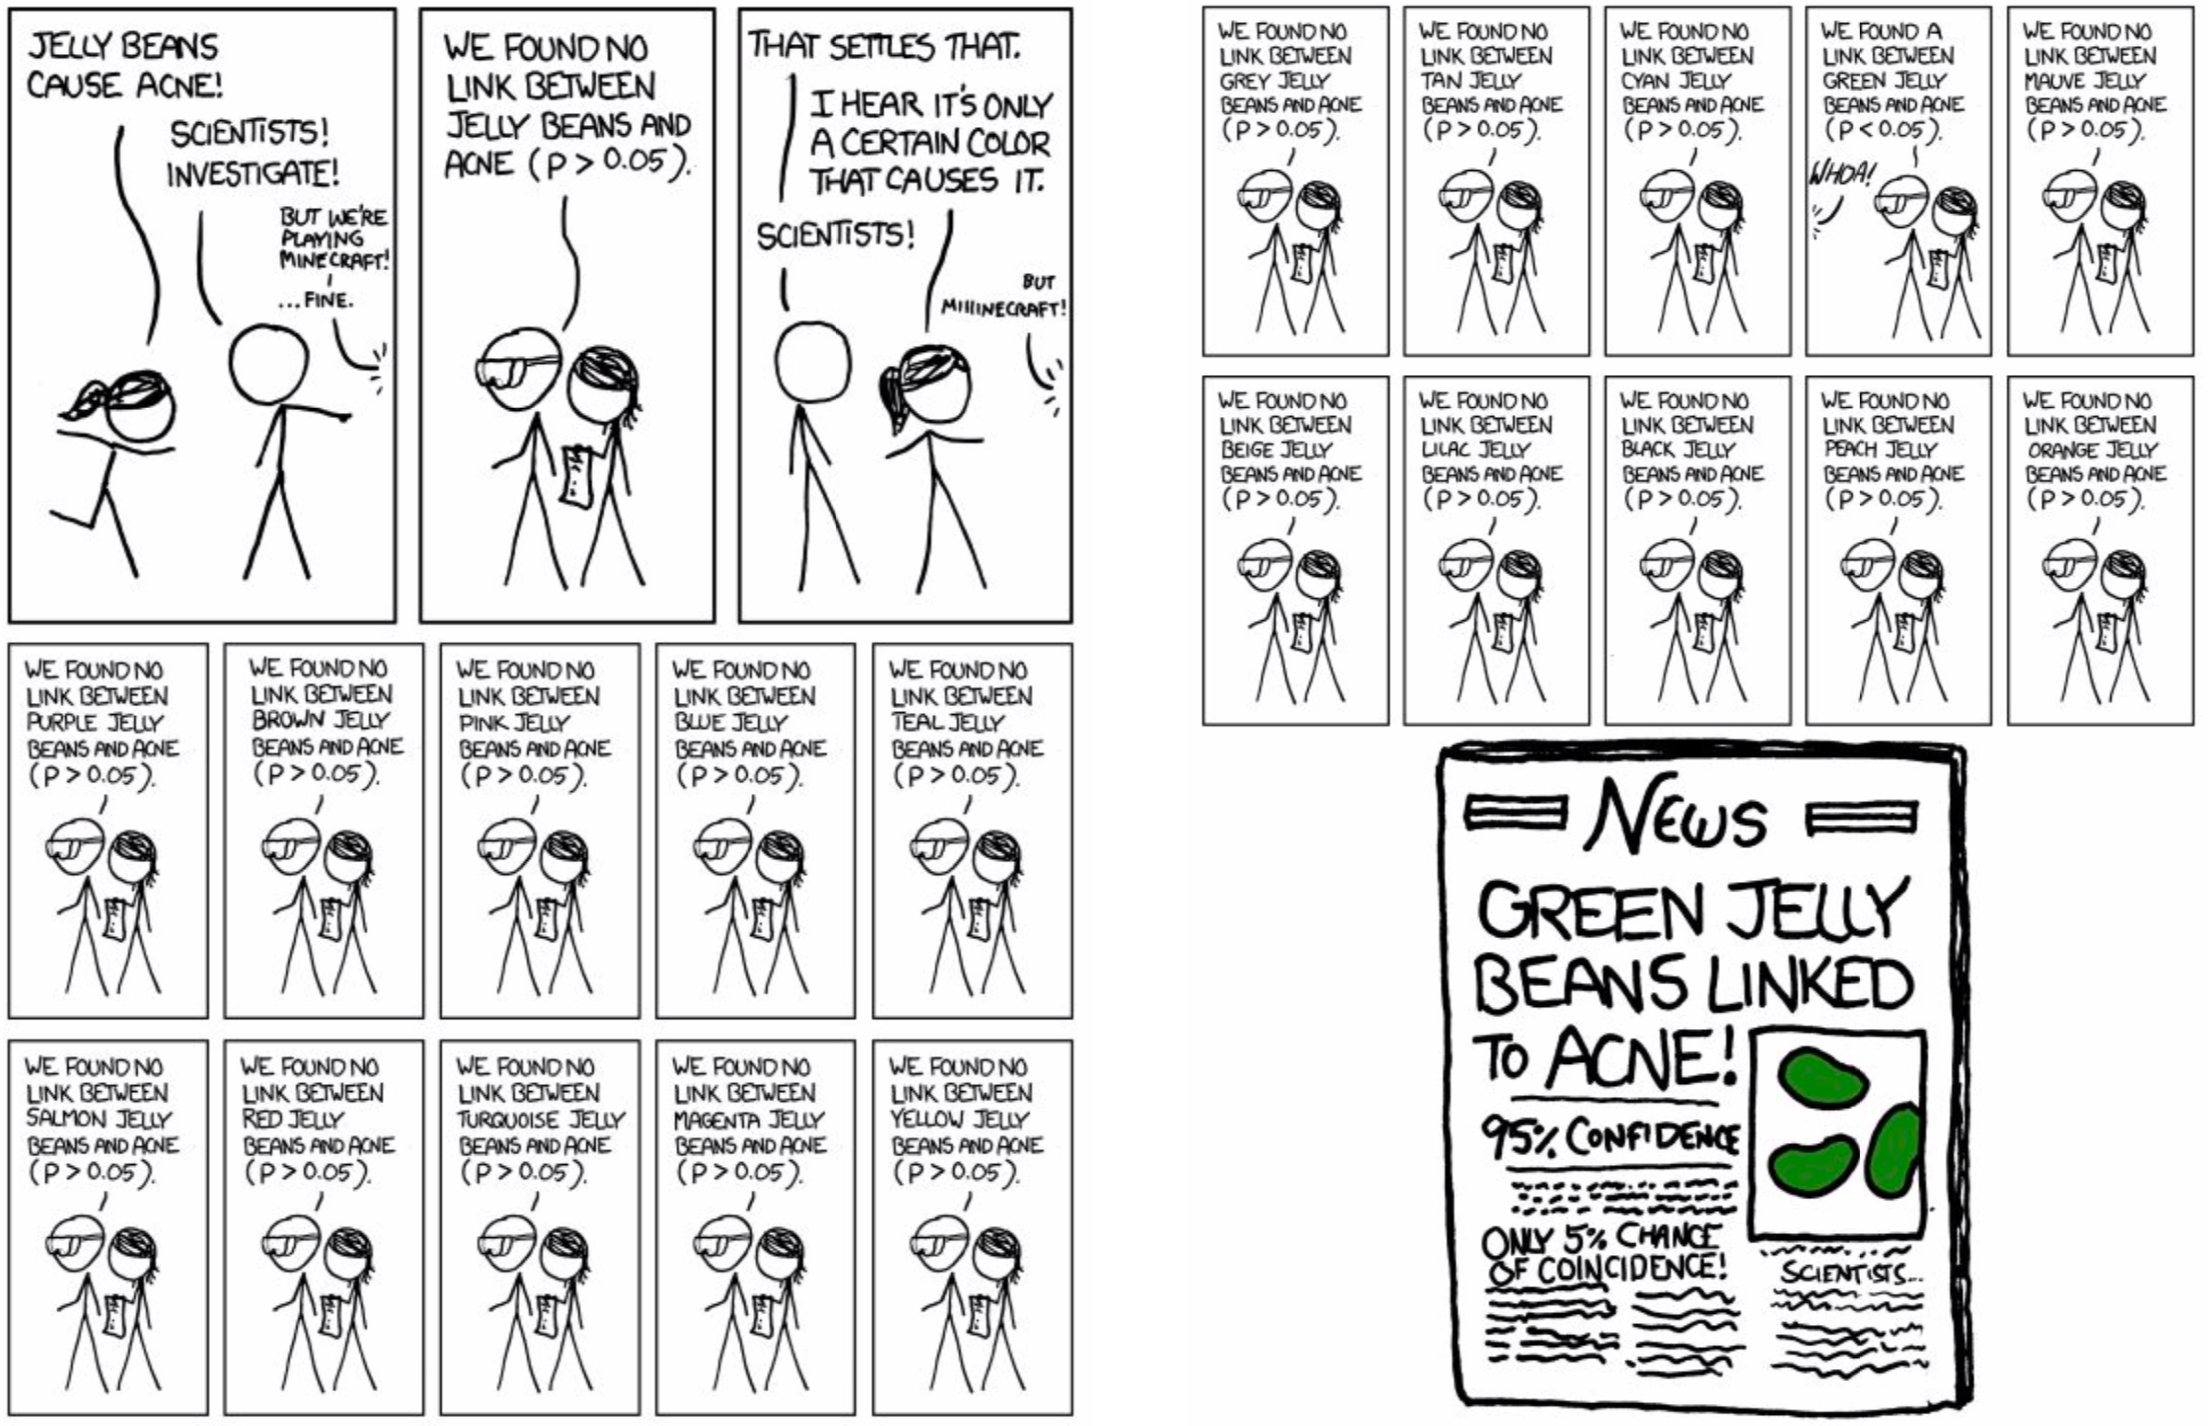

In [27]:
from IPython.display import Image
Image("Hypothesis_data/jelly_beans.png")

# Hypothesis Testing: Testing associations between variables

##### Assumptions of T-Tests, ANOVA and Tukey:
1. **Observations sampled randomly from population**
2. **Standard deviations of the group should be equal:**
The standard deviations for the different categories should be roughly the same (WHY?)
normally divide one std by the other and a ratio between 0.9 - 1.1 is enough.
\[That said, there is also a way to run a 2-sample t-test without assuming equal standard deviations — for example, by setting the equal_var parameter in the scipy.stats.ttest_ind() function equal to False. Running the test in this way has some disadvantages (it essentially makes it harder to reject the null hypothesis even when there is a true difference between groups), so it’s important to check for equal standard deviations before running the test.]
3. **Data should be normally distributed.**
Deviating from this practice depends on how non-normal the data is, and is only acceptable, if the sample size is large enough.
4. **The groups created by the categorical variable must be independent:**
[Here are some examples where the groups are not independent:
the number of goals scored per soccer player before, during, and after undergoing a rigorous training regimen (not independent because the same players are measured in each category)
years of schooling completed by a group of adults compared to their parents (not independent because kids and their parents can influence one another)]

### Two sample ttest

In [ ]:
from scipy.stats import ttest_ind()
tstat, pval = ttest_ind(>sample1>, <sample2>)

### Simulating the two sample ttest

In [2]:
import pandas as pd
import numpy as np

In [11]:
# loading data
heart = pd.read_csv("Hypothesis_data/heart_disease.csv")
heart.sample(3)

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
270,61.0,male,140.0,207.0,asymptomatic,1.0,0.0,138.0,presence
158,60.0,male,140.0,293.0,asymptomatic,0.0,0.0,170.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence


In [10]:
# inspecting the columns heart_disease and trestbps
heart.loc[0:5, ['trestbps','heart_disease']]

,trestbps,heart_disease
0,145.0,absence
1,160.0,presence
2,120.0,presence
3,130.0,absence
4,130.0,absence
5,120.0,absence


#### conceptual progression

1) simulating a "sample distribution of sample mean_differences"(SDSMD)
2) plot SDSMD
3) plot observed_mean_differnce from samples within the SDSMD
4) calculate p_value with placement of observed_mean_difference within SDSMD
5) calculate p_value as proportion of values greater equal o observed observed_mean_difference

In [51]:
# 1. simulating a "sample distribution of sample_mean_diffenrences
scramble = np.random.choice(heart.heart_disease, size = len(heart), replace = False)
sim_trestbps_hd = heart.trestbps[scramble == 'presence']
sim_trestbps_no_hd = heart.trestbps[scramble == 'absence']
sim_mean_diff = np.mean(sim_trestbps_hd) - np.mean(sim_trestbps_no_hd)
print(sim_mean_diff)

-1.2079312160028053


In [52]:
# creating a sample distribution of sample mean differences
null_mean_diff = []
for i in range(1000):
    # reordering heart_disease column
    scramble = np.random.choice(heart.heart_disease, size = len(heart), replace = False)
    sim_trestbps_hd = heart.trestbps[scramble == 'presence']
    sim_trestbps_no_hd = heart.trestbps[scramble == 'absence']
    sim_mean_diff = np.mean(sim_trestbps_hd) - np.mean(sim_trestbps_no_hd)
    null_mean_diff.append(sim_mean_diff)
print(np.max(null_mean_diff),"\n", np.min(null_mean_diff))

5.796850324618362 
 -6.41831900333392


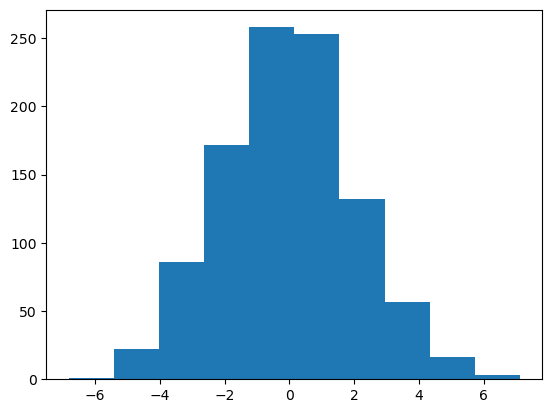

In [42]:
# 2. plotting SDSMD
import matplotlib.pyplot as plt
plt.hist(null_mean_diff)
plt.show()

In [43]:
# the observed mean difference
trestbps_hd = heart.trestbps[heart.heart_disease == 'presence']
trestbps_no_hd = heart.trestbps[heart.heart_disease == 'absence']
observed_mean_diff = np.mean(trestbps_hd) - np.mean(trestbps_no_hd)
print(observed_mean_diff)

5.318345323740999


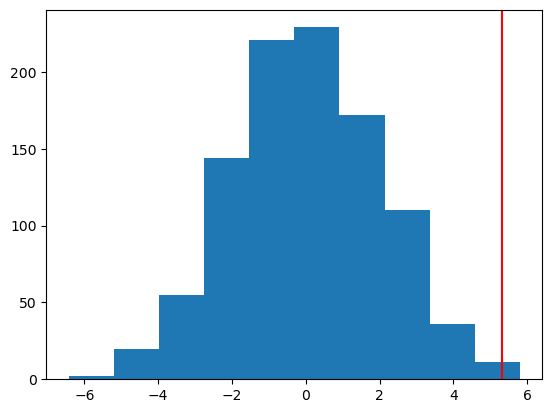

In [53]:
# 3. plot observed_mean_differnce from samples within the SDSMD
import matplotlib.pyplot as plt
plt.hist(null_mean_diff)
plt.axvline(x = observed_mean_diff, color = 'r')
plt.show()

In [46]:
# 4. calculate p_value with placement of observed_mean_difference within SDSMD
# count of means behind the line ('greater)
sum(np.array(null_mean_diff) > observed_mean_diff)

4

In [55]:
# 4. Continued
# pvalue for the two sample test greater than
sum(np.array(null_mean_diff) > observed_mean_diff)/ len(null_mean_diff)

0.002

In [56]:
# 5. calculate p_value as proportion of values greater equal o observed observed_mean_difference
# compare simulation results with library test
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(trestbps_hd, trestbps_no_hd, alternative = 'greater')
print(pval)

0.004274134464297464


### ANALYSIS OF VARIANCE ANOVA

In [2]:
from scipy.stats import f_oneway
# f_oneway("sample1", "sample2", "sample3")

### Tukey range test

In [ ]:
# from statmodels.stats.mmulticomponent import pairwise_tukey
# tukey_results = pairwise_tukeyhsd(<quantiative_variable>, <categorical_variable>, <significance_level>)
# print(tukey_results)
-- correction needed

### Chi-Square Test

##### Assumptions of Chi2-Square Test

In [ ]:
#create table:
import pandas as pd
table = pd.crosstab(variable_1, variable_2)

#run the test:
from scipy.stats import chi2_contingency
chi2, pval, ddof, expected = chi2_contingency(table)

##### Assumptions f T-Tests, ANOVA and Tukey:
1. **Observations sampled independently randomly from population**(F: ensure representativity)
2. **Categories of both variables must be mutually exclusive**
2. **Standard deviations of the group should be equal:**
The standard deviations for the different categories should be roughly the same (WHY?)
normally divide one std by the other and a ratio between 0.9 - 1.1 is enough.
\[That said, there is also a way to run a 2-sample t-test without assuming equal standard deviations — for example, by setting the equal_var parameter in the scipy.stats.ttest_ind() function equal to False. Running the test in this way has some disadvantages (it essentially makes it harder to reject the null hypothesis even when there is a true difference between groups), so it’s important to check for equal standard deviations before running the test.]
3. **Groups should be independent.**
For example, a Chi-Square test would not be appropriate if one of the variables represents three different time points

In [7]:
# installing and importing converter from SVG to png
from cairosvg import svg2png

# converting img for cumulative distribution function
directory = ["Hypothesis_data/Overview_stats.SVG"]

for trans_num, url_ in enumerate(directory):
    svg2png(url=url_,write_to=f'Hypothesis_data/Overview_stats.png')
    
    
# transforming images for poisson distriution
# svg2png(url="Distributions/poisson_lambda_3.SVG",write_to='Distributions/poisson_lambda_3.png')
# svg2png(url="Distributions/poisson_lambda_15.SVG",write_to=f'Distributions/poisson_lambda_15.png')

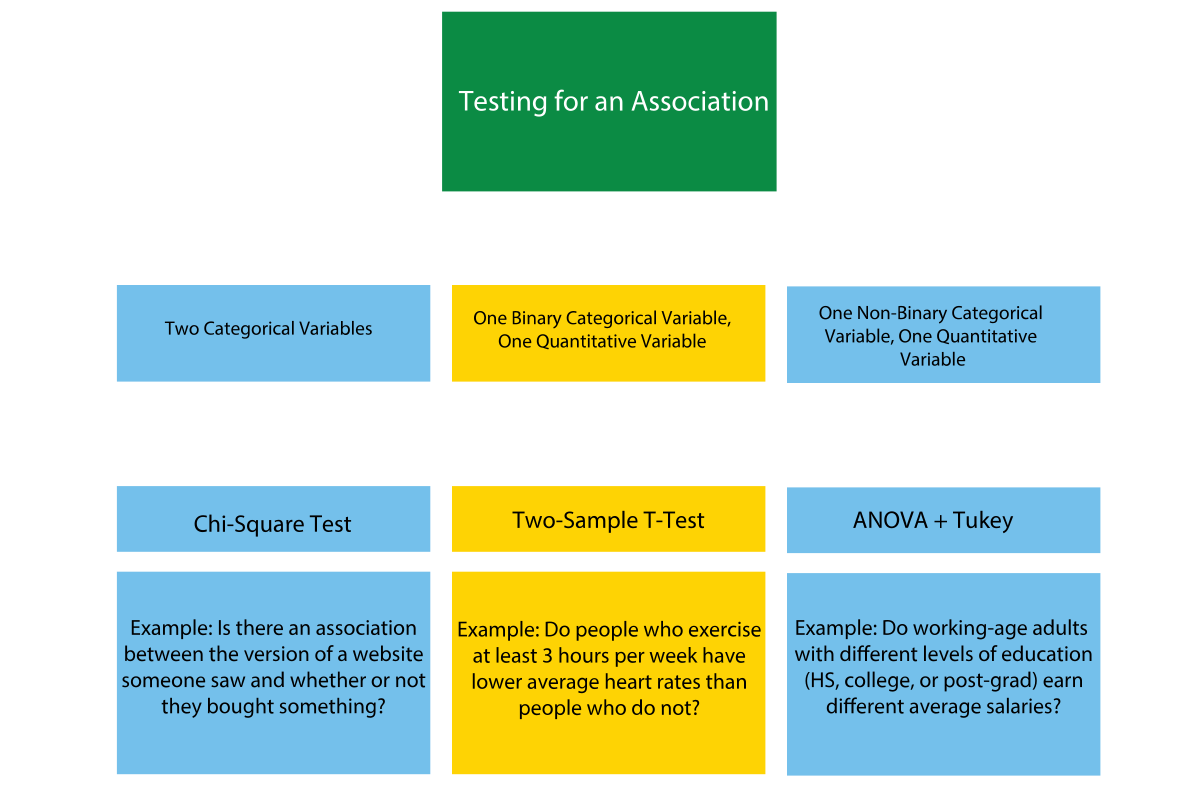

In [25]:
from IPython.display import Image

Image(r"Hypothesis_data/Overview_stats.png")

### In user experience research two sample tests are used (A/B_Testing).
Hypothesis makes claims about two variantes of a single website parameter having no effect:
Two samples are drawn, each one representing one verion of the website parameter and containg respective user behavior data.
So we got an association between a categorical variable (website parameter) and a quantitiative variable (conversion rate at website). 
(For  more information see the next jupyter notebook "Experiemental Design")

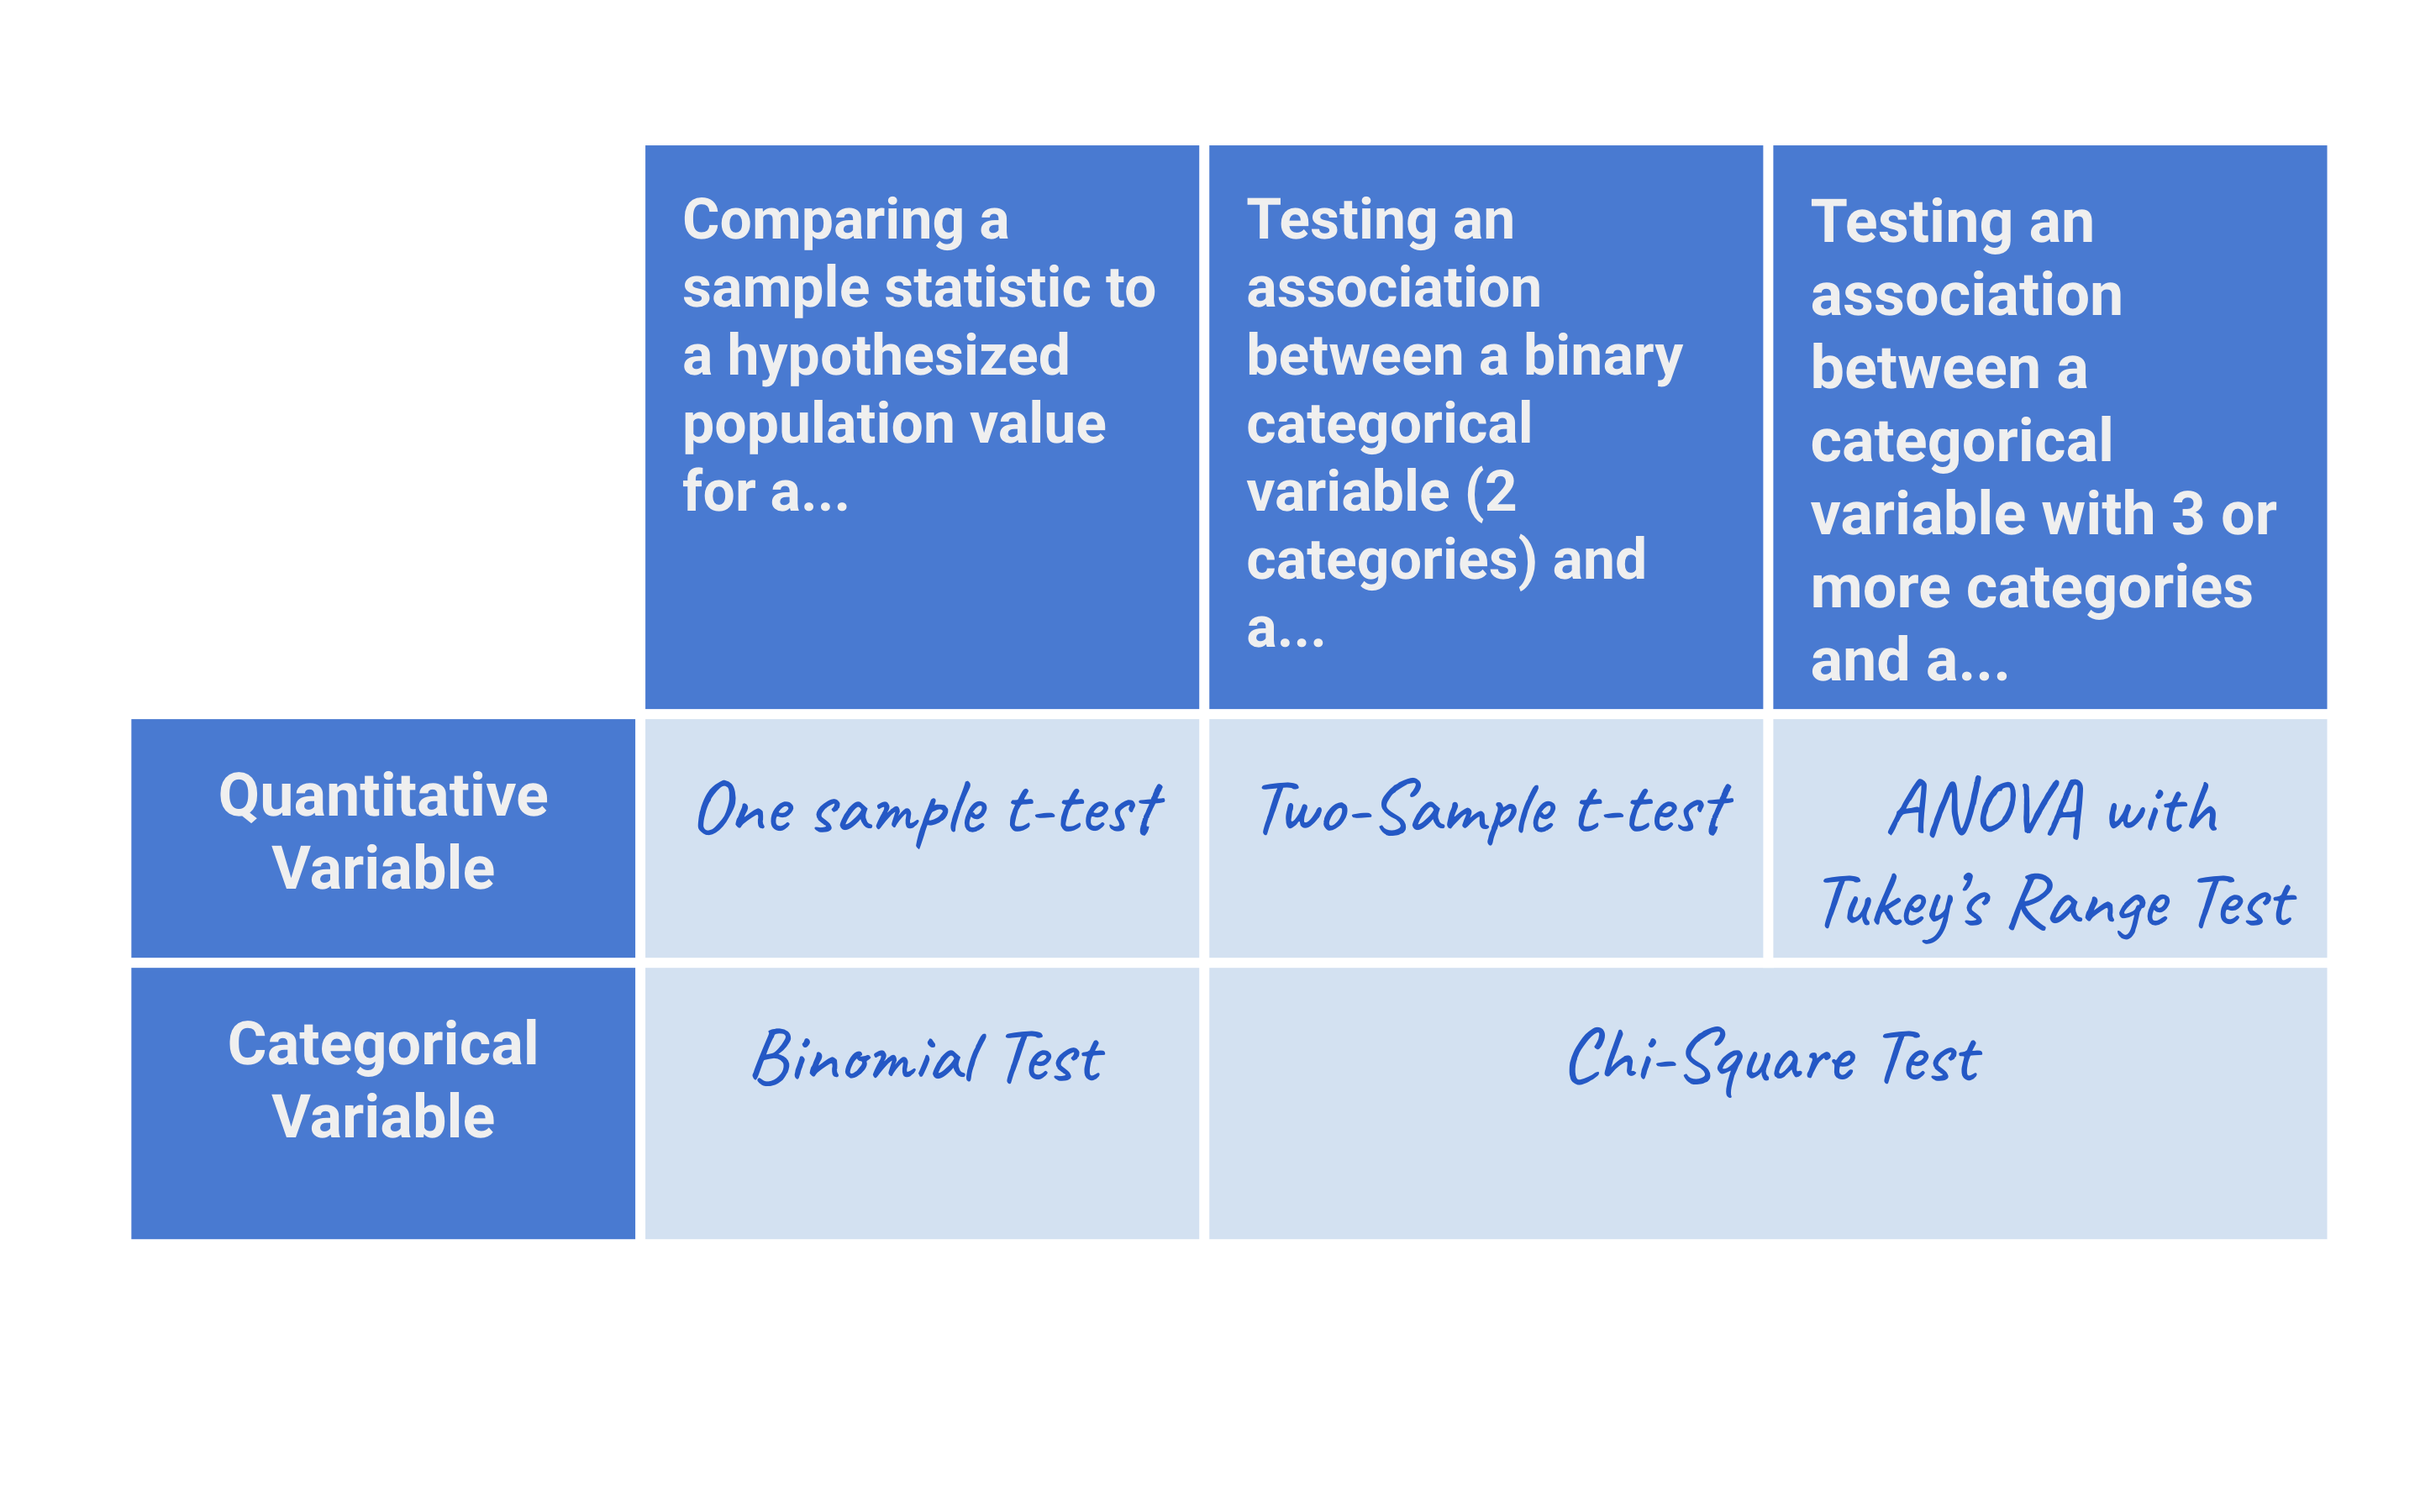

In [1]:
from IPython.display import Image
Image("Experimental Design/choice of test.png")

### Practice project: Familiar (from codecademy)

In [4]:
# Import libraries
import pandas as pd
import numpy as np

# Load datasets
lifespans = pd.read_csv('Hypothesis_data/familiar_lifespan.csv')
iron = pd.read_csv('Hypothesis_data/familiar_iron.csv')

# inspecting data
print(lifespans.head())

# testing for vein_pack lifespans
vein_pack_lifespans = lifespans.loc[lifespans.pack == 'vein']
# print(vein_pack_lifespans, end = "\n"*2)

# mean of category
print(np.mean(vein_pack_lifespans))

# testing for significant difference between the mean of vein_pack data and the assumed population average of 73
'''
null_hypothesis:: The mean of veinpack does not differ from the population mean of 73!
alternative hypothesis:: The man of veinpack is greater than the population mean of 73!
This means we need a one sample ttest.
'''

from scipy.stats import ttest_1samp
print('Running the one sample ttest.')
tstat, pval = ttest_1samp(vein_pack_lifespans.lifespan, 73)
print("The pvalue is:")
print(pval)

# artery pack as second sample
artery_pack_lifespans = lifespans.loc[lifespans.pack == 'artery']
print(artery_pack_lifespans, end = "\n" * 2)

# mean of artery pack
print(np.mean(artery_pack_lifespans))

# testing for difference in mean of lifespans in vein data and artery data
'''Null hypothesis:: both samples are drawn from a population with the same mean
Alternative hypothesis:: the samples are not drawn from populations with the same mean.
'''
# tow sample ttest
from scipy.stats import ttest_ind
print("Running the two sample ttest.")
tstat, pval = ttest_ind(vein_pack_lifespans.lifespan, artery_pack_lifespans.lifespan,)
print("This is the p_value:")
print(pval)

## inspecting the iron in transfusions

# inspecting the data
print(iron.head())

# divide data for later test
arterypack_iron = iron.loc[iron.pack == 'vein']
veinpack_iron = iron.loc[iron.pack == 'artery']
# print("this is length and content of arterypack_iron", len(arterypack_iron),"\n", arterypack_iron)
# print("this is length and content of veinpack_iron", len(veinpack_iron),"\n", veinpack_iron)

# inspecting for assocaition of categorical data: pack 'vein' or 'artery' and iron: 'low', 'medium' and 'high'

Xtab = pd.crosstab(iron.iron, iron.pack)
print(Xtab)
'''
Null hypothesis:: There is no association between the pack (vein vs artery) someone susbribes to and their level of iron
Alternative hypothesis:: There is an association between those two categorical variables.
'''

print("Running the chi2 test for categorical variables")
from scipy.stats import chi2_contingency
f_stat, pval, ddof, expected = chi2_contingency(Xtab)
print("This is the Chi2 p value:")
print(pval)

     pack   lifespan
0    vein  76.255090
1  artery  76.404504
2  artery  75.952442
3  artery  76.923082
4  artery  73.771212
lifespan    76.169013
dtype: float64
Running the one sample ttest.
The pvalue is:
5.972157921433211e-07
      pack   lifespan
1   artery  76.404504
2   artery  75.952442
3   artery  76.923082
4   artery  73.771212
5   artery  74.117420
6   artery  74.963119
10  artery  73.319543
14  artery  75.857401
16  artery  76.335370
17  artery  73.079249
20  artery  76.152654
22  artery  77.023545
25  artery  74.639757
28  artery  78.385477
29  artery  68.314898
31  artery  77.386507
32  artery  73.044766
35  artery  74.544983
36  artery  73.355103
39  artery  73.902213

lifespan    74.873662
dtype: float64
Running the two sample ttest.
This is the p_value:
0.05588883079070819
     pack    iron
0    vein     low
1  artery  normal
2  artery  normal
3  artery  normal
4  artery    high
pack    artery  vein
iron                
high        87    20
low         29   140
normal 

C:\Users\manu_\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\manu_\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\manu_\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users

### Practice project: Fetchmakers (from codecademy)

In [3]:
# Import libraries
import numpy as np
import pandas as pd

# Import data
dogs = pd.read_csv('Hypothesis_data/dog_data.csv')
print(dogs.head())

# change categrical data
dogs.is_rescue.replace({0: 'no', 1: 'yes'}, inplace = True)
dogs.likes_children.replace({0: 'no', 1: 'yes'}, inplace = True)
dogs.is_hypoallergenic.replace({0: 'no', 1: 'yes'}, inplace = True)
print(dogs.sample(5))


# print("Unique dog.breed balues: ",dogs.breed.unique())
# subdivide is_resuce for the breed category whippets
whippets_rescue = dogs[dogs.breed == 'whippet'].is_rescue
num_whippet_rescues = sum(whippets_rescue == 'yes')
print("Whippets that are rescues: ", num_whippet_rescues)
num_whippets = sum(dogs.breed == 'whippet')

# percentage of rescues binomial binary categorical variable one sample
'''null hypothesis:: 8 % of whippets are rescues
alternative hypothesis:: more or less than 8 % are whippets
'''
print("Running the binomial test.")
from scipy.stats import binom_test
pval = binom_test(num_whippet_rescues,num_whippets , p= 0.8)
print("The p value is:")
print(pval)


## inspecting for weight differences in whippets, terriers and pitbulls
wt_terrier = dogs[dogs.breed == 'terrier'].weight
wt_whippet = dogs[dogs.breed == 'whippet'].weight
wt_pitbull = dogs[dogs.breed == 'pitbull'].weight
print("Pitbull weights",wt_pitbull)

# Testing if one if these categories varyes in their quantiative statistic
from scipy.stats import f_oneway
print("Running the ANOVA test")
fstat, pval = f_oneway(wt_terrier, wt_whippet, wt_pitbull)
print("The p value:")
print(pval) # output: 3.276415588274815e-17
'''we can reject the null hypothesis a certainty of 1 - 3.276 e-17
we conclude that at least one pair of dog breeds is different.
Now we test for pairwise differences in weight average.'''


# Subset to just whippets, terriers, and pitbulls
dogs_wtp = dogs[dogs.breed.isin(['whippet', 'terrier', 'pitbull'])]

print('Running the tukey range test')
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(dogs_wtp.weight,dogs_wtp.breed, 0.05)
print(tukey_results)
'''output:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
=====================================================
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
pitbull terrier   -13.24  0.001 -16.728 -9.752   True
pitbull whippet    -3.34 0.0639  -6.828  0.148  False
terrier whippet      9.9  0.001   6.412 13.388   True
-----------------------------------------------------'''


# inspecting an association between breed (categorical) and color (categorical)
# Subset to just poodles and shihtzus
dogs_ps = dogs[dogs.breed.isin(['poodle', 'shihtzu'])]

'''null hypothesis:: There is no association between breed (poodle and shihtzu) and color.
alternative hypothesis:: There is an association
'''
print("Contingency table")
breed_color_contingency = pd.crosstab(dogs_ps.breed, dogs_ps.color)
print(breed_color_contingency)
print('Running the Chi2 Square test')
from scipy.stats import chi2_contingency
f_stat, pval, ddof, expected = chi2_contingency(breed_color_contingency)
print("This is the Chi2 p value:")
print(pval)
print(expected)

   is_rescue  weight  tail_length  age  color  likes_children  \
0          0       6         2.25    2  black               1   
1          0       4         5.36    4  black               0   
2          0       7         3.63    3  black               0   
3          0       5         0.19    2  black               0   
4          0       5         0.37    1  black               1   

   is_hypoallergenic      name      breed  
0                  0      Huey  chihuahua  
1                  0   Cherish  chihuahua  
2                  1     Becka  chihuahua  
3                  0     Addie  chihuahua  
4                  1  Beverlee  chihuahua  
    is_rescue  weight  tail_length  age  color likes_children  \
370        no      60        11.41    3   grey             no   
493        no      62         4.32    4  white             no   
580        no      11         2.97    4   grey            yes   
50         no       1         1.93    2   gold            yes   
673        no      4